In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Carga los datos
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

Promedio de longitud de título en noticias falsas: 14.732805246795282
Promedio de longitud de título en noticias verdaderas: 9.954475416725032


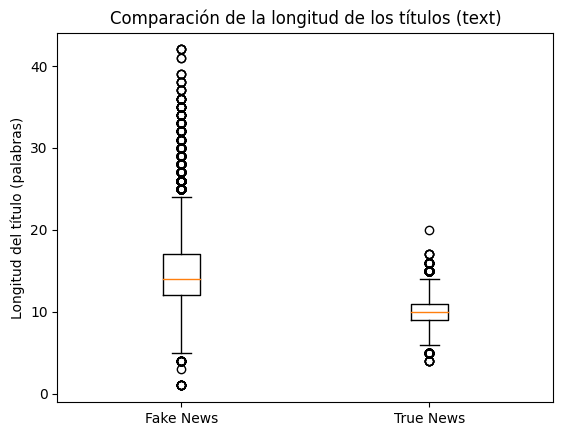

In [3]:
# Calcula la longitud de los títulos
fake_news['title_length'] = fake_news['title'].apply(lambda x: len(x.split()))
true_news['title_length'] = true_news['title'].apply(lambda x: len(x.split()))

# Calcula los promedios
avg_fake_title_length = fake_news['title_length'].mean()
avg_true_title_length = true_news['title_length'].mean()
print(f"Promedio de longitud de título en noticias falsas: {avg_fake_title_length}")
print(f"Promedio de longitud de título en noticias verdaderas: {avg_true_title_length}")

# Crea un boxplot para comparar las longitudes
plt.boxplot([fake_news['title_length'], true_news['title_length']], labels=['Fake News', 'True News'])
plt.title('Comparación de la longitud de los títulos (text)')
plt.ylabel('Longitud del título (palabras)')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


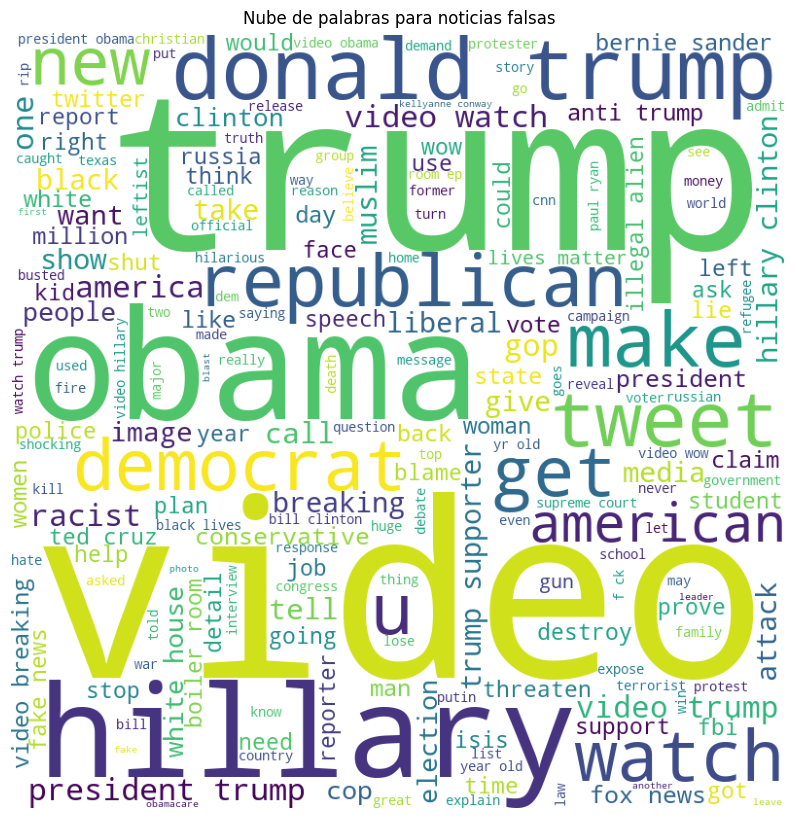

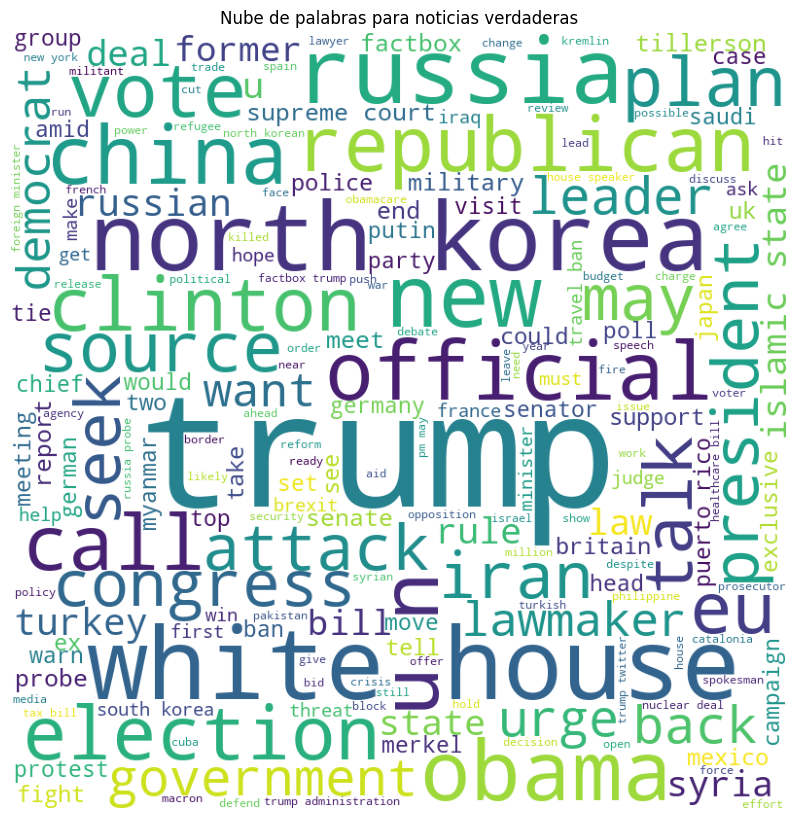

In [16]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Definir palabras adicionales para ignorar
additional_stopwords = ['said', 'say', 'says', 'will'"`", "´", "#","’","\"","\'","\"","\'","\'s","says","u.s.","”","“","‘","-"] # Añade palabras que desees ignorar aquí

# Descargar lista de stopwords en inglés si no se ha descargado ya
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Definir stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

# Función para preprocesar texto
def preprocess(text):
    # Tokenizar y convertir a minúsculas
    tokens = word_tokenize(text.lower())
    # Eliminar puntuación y stopwords
    return ' '.join(word for word in tokens if word not in string.punctuation and word not in stop_words)

# Preprocesar los títulos
fake_news['title_processed'] = fake_news['title'].apply(preprocess)
true_news['title_processed'] = true_news['title'].apply(preprocess)

# Unir todos los títulos procesados en una sola cadena para cada conjunto de datos
fake_text = ' '.join(fake_news['title_processed'])
true_text = ' '.join(true_news['title_processed'])

# Crear nube de palabras para las noticias falsas
wordcloud_fake = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(fake_text)

# Crear nube de palabras para las noticias verdaderas
wordcloud_true = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(true_text)

# Función para dibujar nube de palabras
def draw_wordcloud(wordcloud, title):
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad = 0)
    plt.show()

# Dibujar las nubes de palabras
draw_wordcloud(wordcloud_fake, "Nube de palabras para noticias falsas")
draw_wordcloud(wordcloud_true, "Nube de palabras para noticias verdaderas")

In [17]:
from nltk import FreqDist
import pandas as pd

# Crear objeto FreqDist para las noticias falsas
freq_fake = FreqDist(word_tokenize(fake_text))

# Crear objeto FreqDist para las noticias verdaderas
freq_true = FreqDist(word_tokenize(true_text))

# Crear un DataFrame para las palabras y sus frecuencias en noticias falsas
df_fake = pd.DataFrame({'Palabra': list(freq_fake.keys()), 'Frecuencia': list(freq_fake.values())})

# Crear un DataFrame para las palabras y sus frecuencias en noticias verdaderas
df_true = pd.DataFrame({'Palabra': list(freq_true.keys()), 'Frecuencia': list(freq_true.values())})

# Ordenar los DataFrames por frecuencia descendente
df_fake = df_fake.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)
df_true = df_true.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)

# Imprimir la tabla de frecuencia para noticias falsas
print("Tabla de Frecuencia para Noticias Falsas:")
df_fake

# Imprimir la tabla de frecuencia para noticias verdaderas
print("\nTabla de Frecuencia para Noticias Verdaderas:")
df_true


Tabla de Frecuencia para Noticias Falsas:

Tabla de Frecuencia para Noticias Verdaderas:


,Palabra,Frecuencia
0,trump,5400
1,house,1442
2,north,925
3,russia,912
4,korea,881
...,...,...
15514,formed,1
15515,counterproductive,1
15516,audition,1
15517,prediction,1


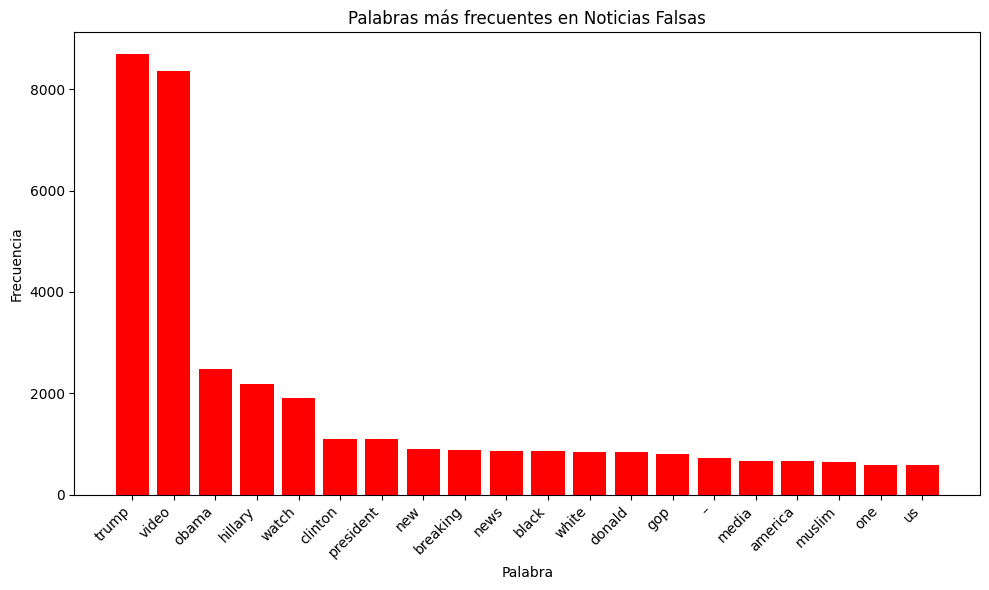

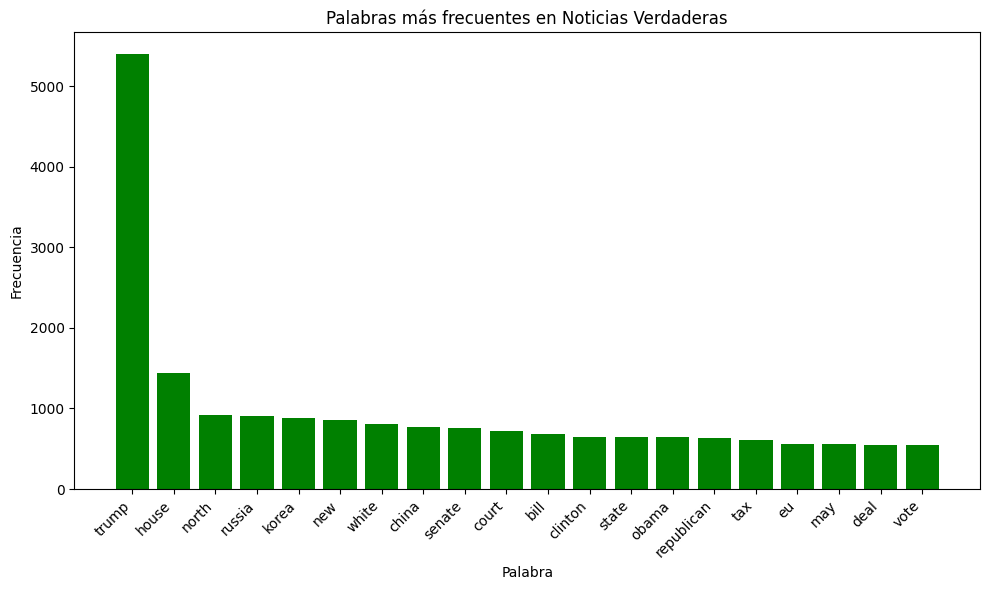

In [18]:
import matplotlib.pyplot as plt

# Seleccionar las N palabras más frecuentes
N = 20
top_words_fake = df_fake.head(N)
top_words_true = df_true.head(N)

# Crear el gráfico de barras para las palabras más frecuentes en noticias falsas
plt.figure(figsize=(10, 6))
plt.bar(top_words_fake['Palabra'], top_words_fake['Frecuencia'], color='red')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en Noticias Falsas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Crear el gráfico de barras para las palabras más frecuentes en noticias verdaderas
plt.figure(figsize=(10, 6))
plt.bar(top_words_true['Palabra'], top_words_true['Frecuencia'], color='green')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en Noticias Verdaderas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


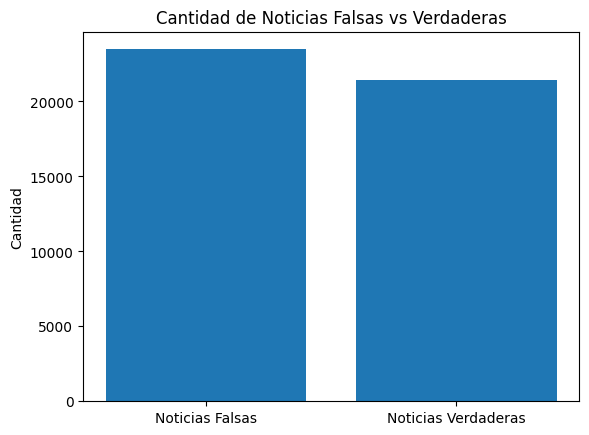

       Tipo de Noticia  Cantidad
0      Noticias Falsas     23481
1  Noticias Verdaderas     21417


In [4]:
# Calcula la cantidad de noticias en cada dataset
num_fake_news = len(fake_news)
num_true_news = len(true_news)

# Crea el gráfico de barras
plt.bar(['Noticias Falsas', 'Noticias Verdaderas'], [num_fake_news, num_true_news])
plt.title('Cantidad de Noticias Falsas vs Verdaderas')
plt.ylabel('Cantidad')
plt.show()

# Crea una tabla con la cantidad de noticias
news_counts = pd.DataFrame({'Tipo de Noticia': ['Noticias Falsas', 'Noticias Verdaderas'], 'Cantidad': [num_fake_news, num_true_news]})
print(news_counts)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


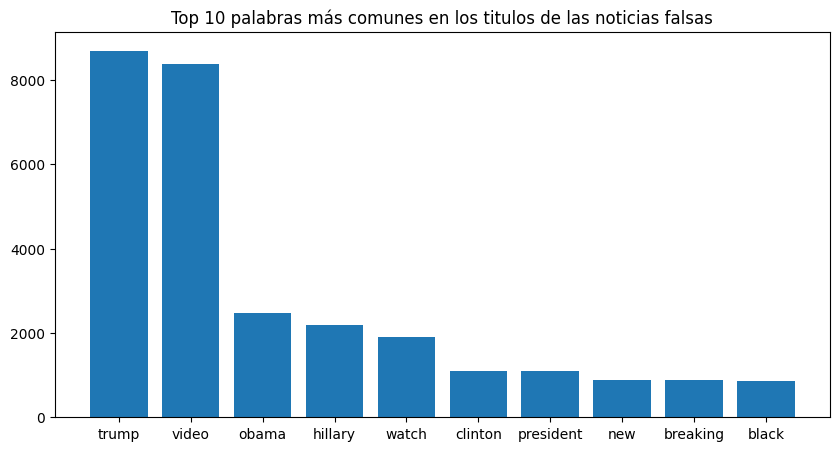

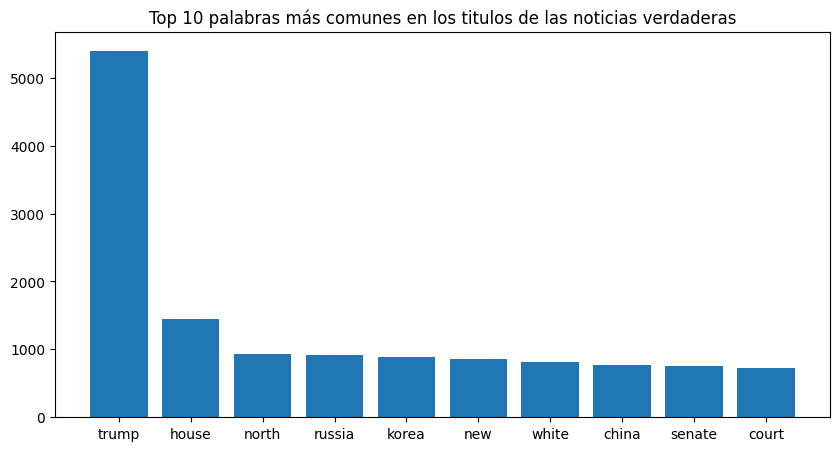

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Carga los datos
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

# Descargar lista de stopwords en inglés si no se ha descargado ya
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords y símbolos especiales a ignorar
stop_words = set(stopwords.words('english') + list(string.punctuation) + ["`", "´", "#","’","\"","\'","\"","\'","\'s","says","u.s.","”","“","‘"])

# Función para preprocesar texto
def preprocess(text):
    # Tokenizar y convertir a minúsculas
    tokens = word_tokenize(text.lower())
    # Eliminar puntuación y stopwords
    return [word for word in tokens if word not in stop_words]

# Preprocesa los títulos y une todos en una lista
fake_words = [word for title in fake_news['title'] for word in preprocess(title)]
true_words = [word for title in true_news['title'] for word in preprocess(title)]

# Cuenta las palabras
fake_counts = Counter(fake_words)
true_counts = Counter(true_words)

# Obtiene las 10 palabras más comunes para cada categoría
top_fake = fake_counts.most_common(10)
top_true = true_counts.most_common(10)

# Función para dibujar gráfico de barras
def draw_barplot(top_words, title):
    words = [word[0] for word in top_words]
    counts = [word[1] for word in top_words]
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(title)
    plt.show()

# Dibujar los gráficos de barras
draw_barplot(top_fake, 'Top 10 palabras más comunes en los titulos de las noticias falsas')
draw_barplot(top_true, 'Top 10 palabras más comunes en los titulos de las noticias verdaderas')


In [13]:
import pandas as pd

# Crea dataframes a partir de las listas de las palabras más comunes
fake_df = pd.DataFrame(top_fake, columns=['Palabra', 'Frecuencia'])
true_df = pd.DataFrame(top_true, columns=['Palabra', 'Frecuencia'])

# Imprime las tablas
print("Top 10 palabras más comunes en noticias falsas:")
print(fake_df)

print("\nTop 10 palabras más comunes en noticias verdaderas:")
print(true_df)


Top 10 palabras más comunes en noticias falsas:
     Palabra  Frecuencia
0      trump        8694
1      video        8373
2          ”        5470
3          “        5028
4          ‘        3431
5      obama        2476
6    hillary        2189
7      watch        1901
8    clinton        1099
9  president        1089

Top 10 palabras más comunes en noticias verdaderas:
  Palabra  Frecuencia
0   trump        5400
1   house        1442
2   north         925
3  russia         912
4   korea         881
5     new         862
6   white         807
7   china         766
8  senate         759
9   court         723


In [16]:
# Función para contar palabras en un título
def count_words(title):
    return len(title.split())

# Calcula el promedio de palabras en los títulos
avg_fake_words = fake_news['title'].apply(count_words).mean()
avg_true_words = true_news['title'].apply(count_words).mean()

# Crea un dataframe para mostrar el resultado en formato de tabla
avg_words_df = pd.DataFrame({'Tipo de Noticia': ['Noticias Falsas', 'Noticias Verdaderas'], 
                             'Promedio de Palabras en Títulos': [avg_fake_words, avg_true_words]})

avg_words_df

,Tipo de Noticia,Promedio de Palabras en Títulos
0,Noticias Falsas,14.732805
1,Noticias Verdaderas,9.954475


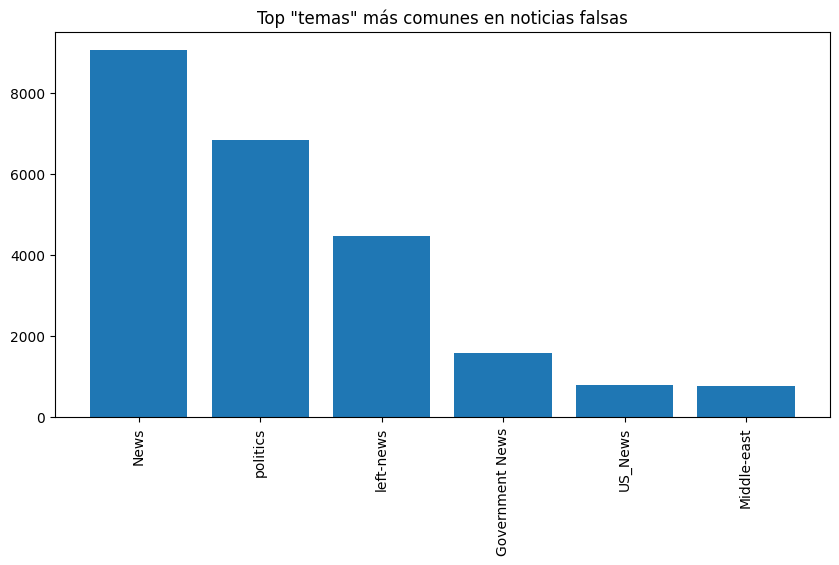

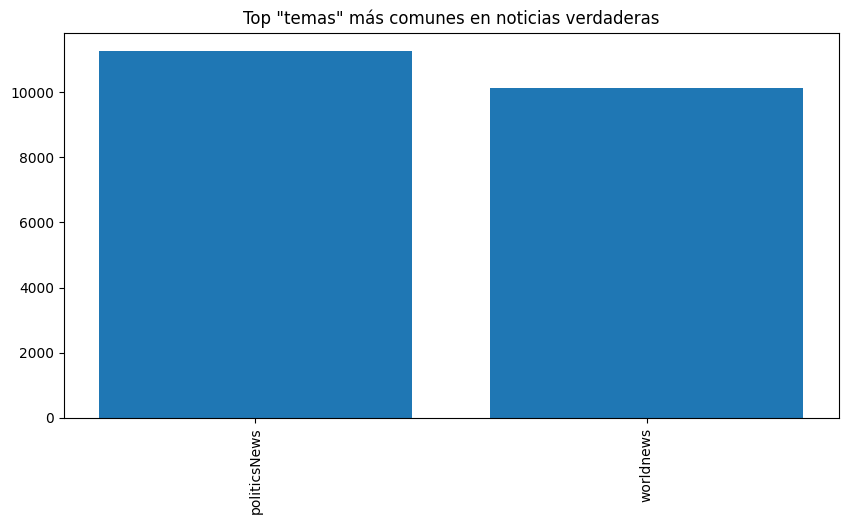

In [5]:
# Calcula los 10 'subject' más comunes en cada dataset
top_fake_subjects = fake_news['subject'].value_counts().nlargest(10)
top_true_subjects = true_news['subject'].value_counts().nlargest(10)

# Función para dibujar gráfico de barras
def draw_barplot(data, title):
    plt.figure(figsize=(10,5))
    plt.bar(data.index, data.values)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Dibujar los gráficos de barras
draw_barplot(top_fake_subjects, 'Top "temas" más comunes en noticias falsas')
draw_barplot(top_true_subjects, 'Top "temas" más comunes en noticias verdaderas')


In [24]:
# Extrae el año de la columna 'date'
fake_news['year'] = fake_news['date'].str.extract('(\d{4})')

# Cuenta cuántas veces aparece cada año
year_counts = fake_news['year'].value_counts().sort_index()

# Crea un dataframe para mostrar los resultados
year_counts_df = pd.DataFrame({'Año': year_counts.index, 'Cantidad de noticias': year_counts.values})

year_counts_df


,Año,Cantidad de noticias
0,2015,2485
1,2016,11754
2,2017,9203


In [25]:
# Extrae el año de la columna 'date'
true_news['year'] = true_news['date'].str.extract('(\d{4})')

# Cuenta cuántas veces aparece cada año
year_counts = true_news['year'].value_counts().sort_index()

# Crea un dataframe para mostrar los resultados
year_counts_df = pd.DataFrame({'Año': year_counts.index, 'Cantidad de noticias': year_counts.values})

year_counts_df


,Año,Cantidad de noticias
0,2016,4716
1,2017,16701


In [28]:
# Cálcula la cantidad de noticias
fake_news_count = len(fake_news)
true_news_count = len(true_news)

# Crea un dataframe para mostrar el resultado en formato de tabla
news_count_df = pd.DataFrame({'Tipo de Noticia': ['Noticias Falsas', 'Noticias Verdaderas'], 
                             'Cantidad de Noticias': [fake_news_count, true_news_count]})

news_count_df


,Tipo de Noticia,Cantidad de Noticias
0,Noticias Falsas,23481
1,Noticias Verdaderas,21417


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import pyLDAvis.gensim_models
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocesamiento de texto
stop_words = set(stopwords.words('english'))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    return [token for token in tokens if token not in stop_words]

# Aplica el preprocesamiento al texto de las noticias falsas y verdaderas
fake_news['tokens'] = fake_news['text'].map(preprocess)
true_news['tokens'] = true_news['text'].map(preprocess)

# Crea diccionarios y corpus para cada conjunto de noticias
fake_dict = corpora.Dictionary(fake_news['tokens'])
true_dict = corpora.Dictionary(true_news['tokens'])

fake_corpus = [fake_dict.doc2bow(text) for text in fake_news['tokens']]
true_corpus = [true_dict.doc2bow(text) for text in true_news['tokens']]

# Aplica LDA a cada conjunto de noticias
fake_lda = models.LdaModel(fake_corpus, num_topics=10, id2word=fake_dict, passes=10)
true_lda = models.LdaModel(true_corpus, num_topics=10, id2word=true_dict, passes=10)

# Visualiza los resultados
fake_vis = pyLDAvis.gensim_models.prepare(fake_lda, fake_corpus, fake_dict)
true_vis = pyLDAvis.gensim_models.prepare(true_lda, true_corpus, true_dict)

pyLDAvis.display(fake_vis)
pyLDAvis.display(true_vis)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import nltk
from gensim import corpora
from gensim.models import LdaModel

# Descarga de recursos NLTK necesarios
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Lista de palabras vacías en inglés
stop_words = set(stopwords.words('english'))

# Tokenización y eliminación de palabras vacías
true_news['tokens'] = true_news['text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Creación del diccionario y la matriz de términos del documento
dictionary = corpora.Dictionary(true_news['tokens'])
doc_term_matrix = [dictionary.doc2bow(token) for token in true_news['tokens']]

# Creación del modelo LDA
lda = LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

# Guardar el modelo
lda.save('lda_model_true_news')

# Imprimir los temas
topics = lda.print_topics(num_words=4)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DireC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Cargar el modelo
lda_model = LdaModel.load('lda_model_true_news')

# Preparar los datos para la visualización
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

# Guardar la visualización como un archivo HTML
pyLDAvis.save_html(vis_data, 'lda_visualization.html')


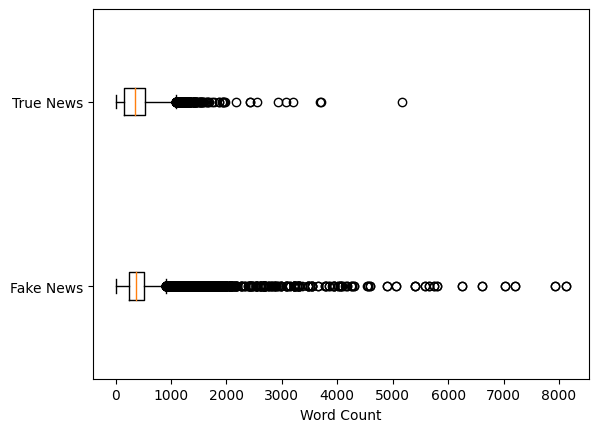

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datasets
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Agregar una nueva columna con la cantidad de palabras en cada texto
df_fake['word_count'] = df_fake['text'].apply(lambda x: len(str(x).split()))
df_true['word_count'] = df_true['text'].apply(lambda x: len(str(x).split()))

# Crear una figura y un set de ejes
fig, ax = plt.subplots()

# Crear un boxplot para cada dataset
ax.boxplot([df_fake['word_count'], df_true['word_count']], vert=False)

# Configurar los nombres de los ejes
ax.set_yticklabels(['Fake News', 'True News'])
ax.set_xlabel('Word Count')

# Mostrar el gráfico
plt.show()


In [13]:
import pandas as pd

# Cargar los datos
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

# Agregar una nueva columna con la longitud de cada texto
fake['text_length'] = fake['text'].apply(len)
true['text_length'] = true['text'].apply(len)

# Calcular el promedio de la longitud de los textos en cada dataset
average_fake = fake['text_length'].mean()
average_true = true['text_length'].mean()

# Crear una tabla con los promedios
table = pd.DataFrame({
    'Dataset': ['Fake.csv', 'True.csv'],
    'Average Text Length': [average_fake, average_true]
})

table

,Dataset,Average Text Length
0,Fake.csv,2547.396235
1,True.csv,2383.278517


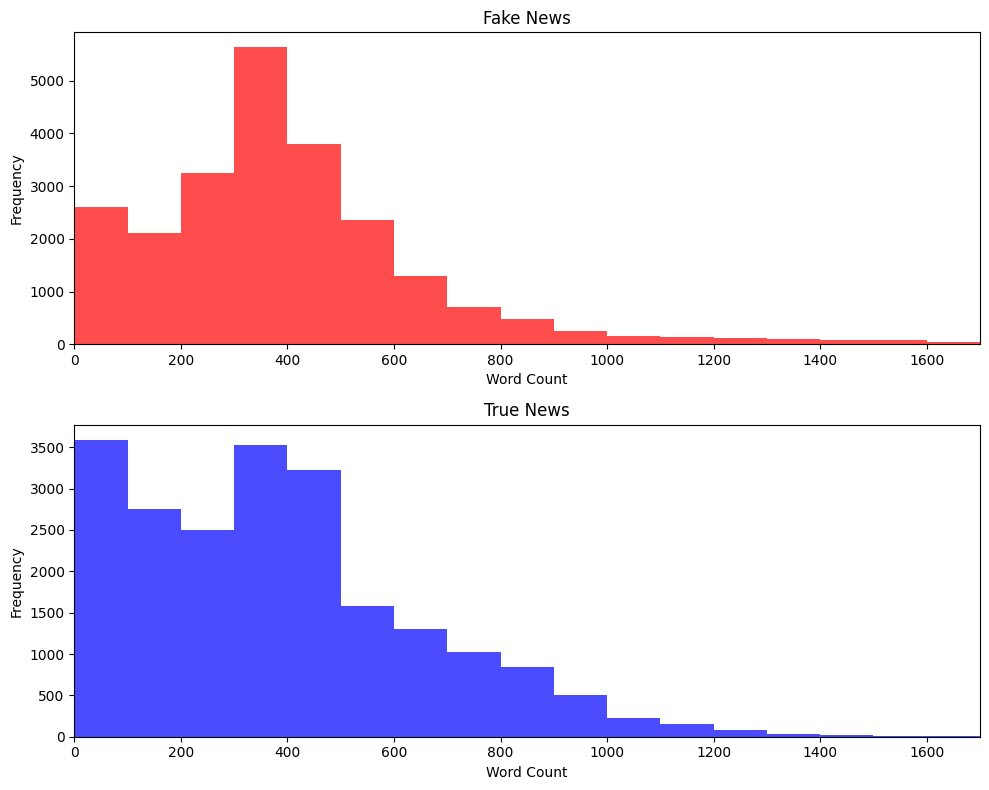

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los datasets
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Agregar una nueva columna con la cantidad de palabras en cada texto
df_fake['word_count'] = df_fake['text'].apply(lambda x: len(str(x).split()))
df_true['word_count'] = df_true['text'].apply(lambda x: len(str(x).split()))

# Crear una lista de bordes de los intervalos, que van de 0 a 2000 con un paso de 100
bins = np.arange(0, 2001, 100)

# Crear una figura y un set de ejes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Crear un histograma para cada dataset
ax[0].hist(df_fake['word_count'], bins=bins, color='red', alpha=0.7)
ax[1].hist(df_true['word_count'], bins=bins, color='blue', alpha=0.7)

# Configurar los nombres de los ejes y los títulos de cada histograma
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Fake News')

ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')
ax[1].set_title('True News')

# Ajustar los límites del eje x
ax[0].set_xlim(0, 1700)
ax[1].set_xlim(0, 1700)

# Ajustar los espacios entre los histogramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


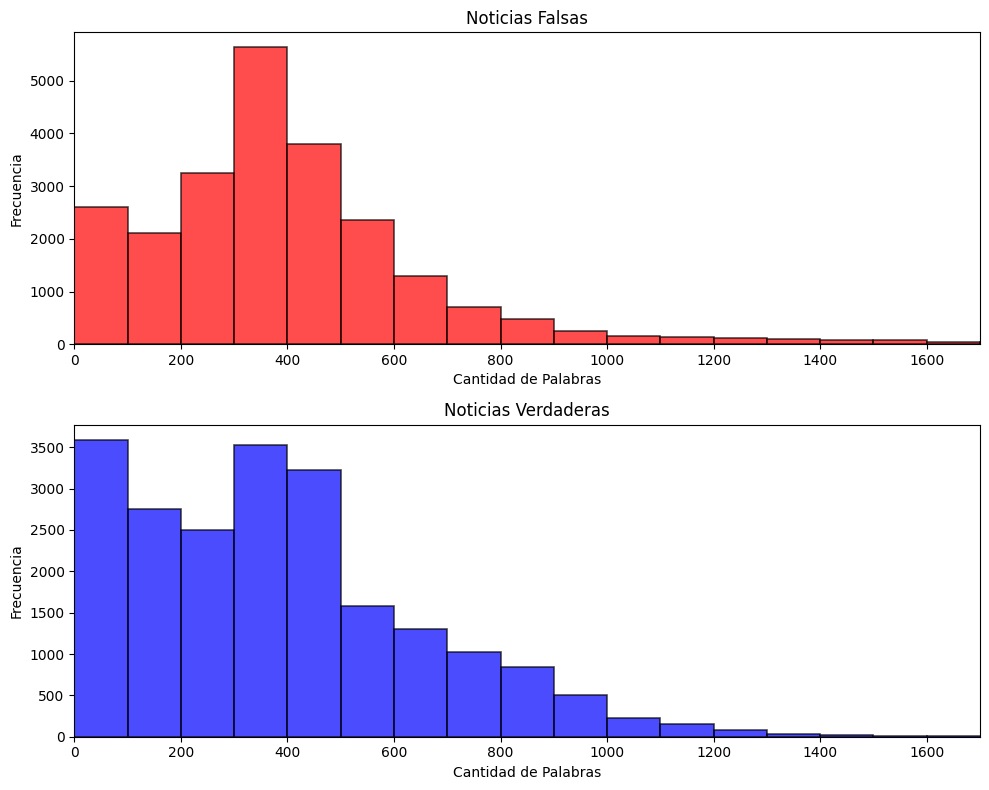

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los datasets
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Agregar una nueva columna con la cantidad de palabras en cada texto
df_fake['word_count'] = df_fake['text'].apply(lambda x: len(str(x).split()))
df_true['word_count'] = df_true['text'].apply(lambda x: len(str(x).split()))

# Crear una lista de bordes de los intervalos, que van de 0 a 2000 con un paso de 100
bins = np.arange(0, 2001, 100)

# Crear una figura y un set de ejes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Crear un histograma para cada dataset
ax[0].hist(df_fake['word_count'], bins=bins, color='red', alpha=0.7, edgecolor='black', linewidth=1.2)
ax[1].hist(df_true['word_count'], bins=bins, color='blue', alpha=0.7, edgecolor='black', linewidth=1.2)

# Configurar los nombres de los ejes y los títulos de cada histograma
ax[0].set_xlabel('Cantidad de Palabras')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Noticias Falsas')

ax[1].set_xlabel('Cantidad de Palabras')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Noticias Verdaderas')

# Ajustar los límites del eje x
ax[0].set_xlim(0, 1700)
ax[1].set_xlim(0, 1700)

# Ajustar los espacios entre los histogramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [26]:
# Calcular el promedio de la cantidad de palabras en noticias falsas
promedio_fake = df_fake['word_count'].mean()

# Calcular el promedio de la cantidad de palabras en noticias verdaderas
promedio_true = df_true['word_count'].mean()

# Imprimir los promedios
print("Promedio de palabras en Noticias Falsas:", promedio_fake)
print("Promedio de palabras en Noticias Verdaderas:", promedio_true)

# Calcular la mediana de la cantidad de palabras en noticias falsas
mediana_fake = df_fake['word_count'].median()

# Calcular la mediana de la cantidad de palabras en noticias verdaderas
mediana_true = df_true['word_count'].median()

# Imprimir las medianas
print("Mediana de palabras en Noticias Falsas:", mediana_fake)
print("Mediana de palabras en Noticias Verdaderas:", mediana_true)



Promedio de palabras en Noticias Falsas: 423.1979046888974
Promedio de palabras en Noticias Verdaderas: 385.6400989867862
Mediana de palabras en Noticias Falsas: 363.0
Mediana de palabras en Noticias Verdaderas: 359.0


In [28]:
# Crear un DataFrame para la media y la mediana
df_stats = pd.DataFrame({'Tipo de Noticia': ['Noticias Falsas', 'Noticias Verdaderas'],
                         'Media': [promedio_fake, promedio_true],
                         'Mediana': [mediana_fake, mediana_true]})

# Convertir los valores a cadena de texto
df_stats['Media'] = df_stats['Media'].round(2).astype(str)
df_stats['Mediana'] = df_stats['Mediana'].round(2).astype(str)

df_stats

,Tipo de Noticia,Media,Mediana
0,Noticias Falsas,423.2,363.0
1,Noticias Verdaderas,385.64,359.0


In [24]:
import pandas as pd

# Leer los datasets
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Agregar una nueva columna con la longitud de cada texto
df_fake['text_length'] = df_fake['text'].apply(lambda x: len(str(x).split()))
df_true['text_length'] = df_true['text'].apply(lambda x: len(str(x).split()))

# Calcular el promedio
average_length_fake = df_fake['text_length'].mean()
average_length_true = df_true['text_length'].mean()

# Crear un DataFrame para presentar los resultados
df_average_length = pd.DataFrame({
    'Dataset': ['Fake', 'True'],
    'Longitud media del texto': [average_length_fake, average_length_true]
})

# Imprimir el DataFrame
df_average_length


,Dataset,Longitud media del texto
0,Fake,423.197905
1,True,385.640099


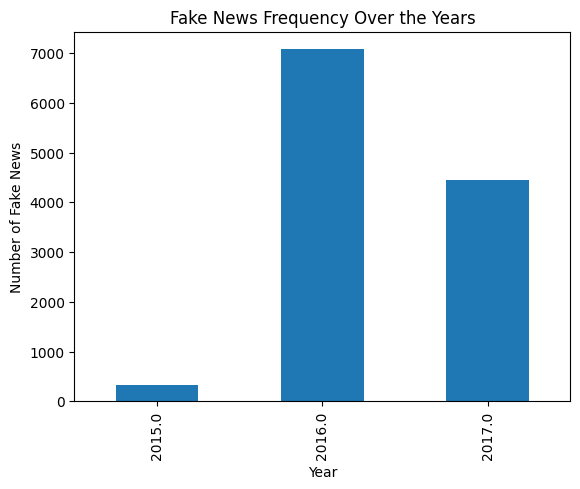

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df_fake = pd.read_csv('Fake.csv')

# Convertir la columna "date" a datetime
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')

# Crear una nueva columna para el año y el mes
df_fake['year'] = df_fake['date'].dt.year
df_fake['month'] = df_fake['date'].dt.month

# Agrupar por año y contar las noticias
news_per_year = df_fake.groupby('year').size()

# Crear un gráfico de barras
news_per_year.plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Number of Fake News')
plt.title('Fake News Frequency Over the Years')
plt.show()


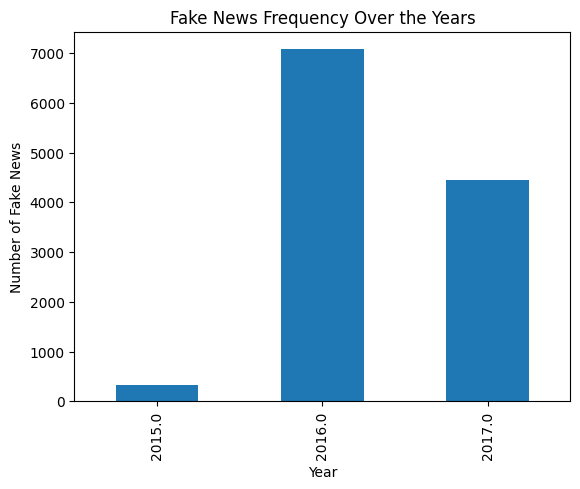

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df_fake = pd.read_csv('Fake.csv')

# Convertir la columna "date" a datetime
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')

# Crear una nueva columna para el año y el mes
df_fake['year'] = df_fake['date'].dt.year
df_fake['month'] = df_fake['date'].dt.month

# Agrupar por año y contar las noticias
news_per_year = df_fake.groupby('year').size()

# Crear un gráfico de barras
news_per_year.plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Number of Fake News')
plt.title('Fake News Frequency Over the Years')
plt.show()


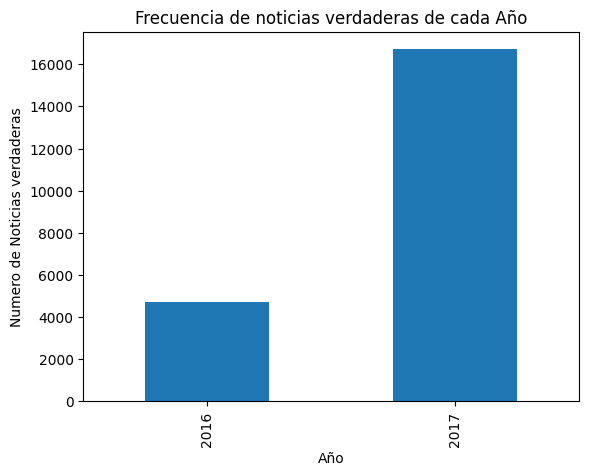

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df_true = pd.read_csv('True.csv')

# Convertir la columna "date" a datetime
df_true['date'] = pd.to_datetime(df_true['date'], errors='coerce')

# Crear una nueva columna para el año y el mes
df_true['year'] = df_true['date'].dt.year
df_true['month'] = df_true['date'].dt.month

# Agrupar por año y contar las noticias
news_per_year_true = df_true.groupby('year').size()

# Crear un gráfico de barras
news_per_year_true.plot(kind='bar')

plt.xlabel('Año')
plt.ylabel('Numero de Noticias verdaderas')
plt.title('Frecuencia de noticias verdaderas de cada Año')
plt.show()


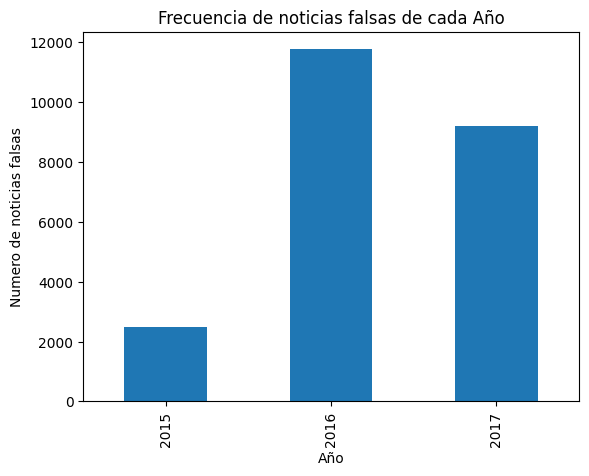

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df_fake = pd.read_csv('Fake.csv')

# Extraer el año de la columna 'date' 
df_fake['year'] = df_fake['date'].apply(lambda x: x.split()[-1])

# Comprobar y eliminar si hay alguna entrada en la columna 'year' que no sea un año válido
df_fake = df_fake[df_fake['year'].str.isdigit()]

# Convertir la columna 'year' a integer
df_fake['year'] = df_fake['year'].astype(int)

# Contar las noticias por año
news_per_year_fake = df_fake['year'].value_counts().sort_index()

# Crear un histograma
news_per_year_fake.plot(kind='bar')

plt.xlabel('Año')
plt.ylabel('Numero de noticias falsas')
plt.title('Frecuencia de noticias falsas de cada Año')
plt.show()


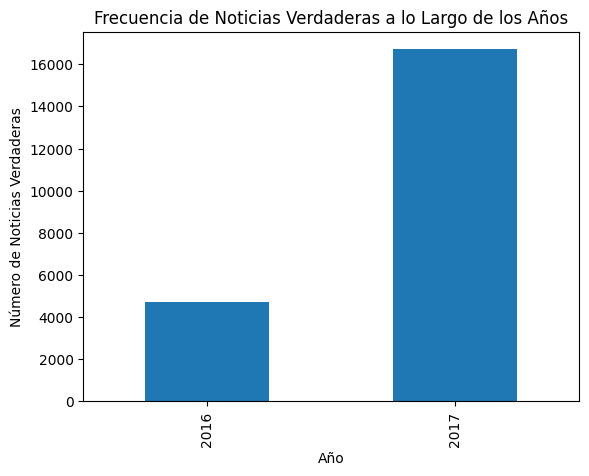

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df_true = pd.read_csv('True.csv')

# Extraer el año de la columna 'date' 
df_true['year'] = df_true['date'].apply(lambda x: x.split()[-1])

# Comprobar y eliminar si hay alguna entrada en la columna 'year' que no sea un año válido
df_true = df_true[df_true['year'].str.isdigit()]

# Convertir la columna 'year' a integer
df_true['year'] = df_true['year'].astype(int)

# Contar las noticias por año
news_per_year_true = df_true['year'].value_counts().sort_index()

# Crear un histograma
news_per_year_true.plot(kind='bar')

plt.xlabel('Año')
plt.ylabel('Número de Noticias Verdaderas')
plt.title('Frecuencia de Noticias Verdaderas a lo Largo de los Años')
plt.show()


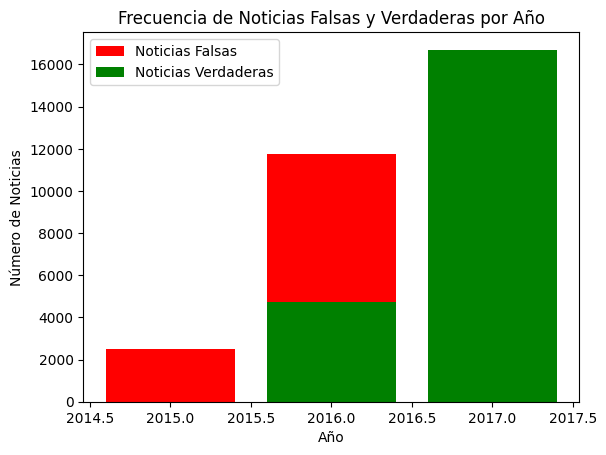

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos de Fake.csv
df_fake = pd.read_csv('Fake.csv')

# Extraer el año de la columna 'date' 
df_fake['year'] = df_fake['date'].apply(lambda x: x.split()[-1])

# Comprobar y eliminar si hay alguna entrada en la columna 'year' que no sea un año válido
df_fake = df_fake[df_fake['year'].str.isdigit()]

# Convertir la columna 'year' a integer
df_fake['year'] = df_fake['year'].astype(int)

# Contar las noticias falsas por año
news_per_year_fake = df_fake['year'].value_counts().sort_index()

# Leer los datos de True.csv
df_true = pd.read_csv('True.csv')

# Extraer el año de la columna 'date' 
df_true['year'] = df_true['date'].apply(lambda x: x.split()[-1])

# Comprobar y eliminar si hay alguna entrada en la columna 'year' que no sea un año válido
df_true = df_true[df_true['year'].str.isdigit()]

# Convertir la columna 'year' a integer
df_true['year'] = df_true['year'].astype(int)

# Contar las noticias verdaderas por año
news_per_year_true = df_true['year'].value_counts().sort_index()

# Crear un gráfico de barras para ambos datasets
plt.bar(news_per_year_fake.index, news_per_year_fake, color='red', label='Noticias Falsas')
plt.bar(news_per_year_true.index, news_per_year_true, color='green', label='Noticias Verdaderas')

plt.xlabel('Año')
plt.ylabel('Número de Noticias')
plt.title('Frecuencia de Noticias Falsas y Verdaderas por Año')
plt.legend()

plt.show()


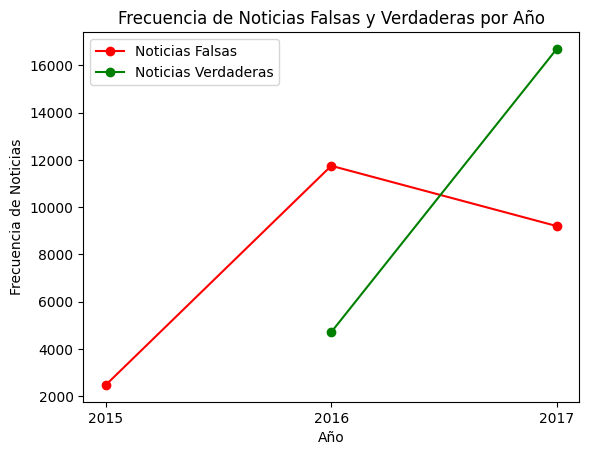

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Extraer el año de la columna 'date' para noticias falsas
df_fake['year'] = df_fake['date'].apply(lambda x: x.split()[-1])

# Comprobar y eliminar si hay alguna entrada en la columna 'year' que no sea un año válido
df_fake = df_fake[df_fake['year'].str.isdigit()]

# Convertir la columna 'year' a integer
df_fake['year'] = df_fake['year'].astype(int)

# Filtrar las noticias falsas para los años 2015, 2016 y 2017
df_fake = df_fake[df_fake['year'].isin([2015, 2016, 2017])]

# Calcular la frecuencia de noticias falsas por año
news_per_year_fake = df_fake['year'].value_counts().sort_index()

# Extraer el año de la columna 'date' para noticias verdaderas
df_true['year'] = df_true['date'].apply(lambda x: x.split()[-1])

# Comprobar y eliminar si hay alguna entrada en la columna 'year' que no sea un año válido
df_true = df_true[df_true['year'].str.isdigit()]

# Convertir la columna 'year' a integer
df_true['year'] = df_true['year'].astype(int)

# Filtrar las noticias verdaderas para los años 2015, 2016 y 2017
df_true = df_true[df_true['year'].isin([2015, 2016, 2017])]

# Calcular la frecuencia de noticias verdaderas por año
news_per_year_true = df_true['year'].value_counts().sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear el gráfico de líneas para noticias falsas
ax.plot(news_per_year_fake.index, news_per_year_fake, marker='o', linestyle='-', color='red', label='Noticias Falsas')

# Crear el gráfico de líneas para noticias verdaderas
ax.plot(news_per_year_true.index, news_per_year_true, marker='o', linestyle='-', color='green', label='Noticias Verdaderas')

# Configurar los ejes y el título
ax.set_xlabel('Año')
ax.set_ylabel('Frecuencia de Noticias')
ax.set_title('Frecuencia de Noticias Falsas y Verdaderas por Año')

# Agregar una leyenda
ax.legend()

# Establecer los ticks del eje X
ax.set_xticks([2015, 2016, 2017])

# Mostrar el gráfico
plt.show()
